In [1]:
#attempting for the 60000 dataframe for now

In [2]:
'''
- data loader? 
- tokenizer?
- conversion to words and numerical data, to and fro?
- model
- train
- eval
- 
'''

'\n- data loader? \n- tokenizer?\n- conversion to words and numerical data, to and fro?\n- model\n- train\n- eval\n- \n'

In [3]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv('dataset_topics_60k.csv')
print(df)
df.dtypes

       Unnamed: 0                        0                             1  \
0              24      visiting the graves     stronger the october wind   
1             141  profound blue of night    the resin and salt of pines   
2             142  scattered in the ditch   like tiny scraps of blue sky   
3             343   the smell of her hands     on the neck of the bottle   
4             435       christmas services    a cellular phone rings out   
...           ...                      ...                           ...   
26322       59995      i hate shopping for     presents with a passion i   
26323       59996         i really enjoyed   myself this weekend with my   
26324       59997         have a happy and    safe halloween from all of   
26325       59998     merry christmas rach    sending all my love to you   
26326       59999       and i'm going back   to school only for the hoes   

                         2       source  \
0      at my grandparents'  tempslibres   
1

Unnamed: 0            int64
0                    object
1                    object
2                    object
source               object
hash                 object
topic1              float64
topic2              float64
topic3              float64
topic4              float64
topic5              float64
topic6              float64
topic7              float64
topic8              float64
topic9              float64
topic10             float64
topic11             float64
topic12             float64
topic13             float64
topic14             float64
topic15             float64
best topic           object
best probability    float64
dtype: object

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

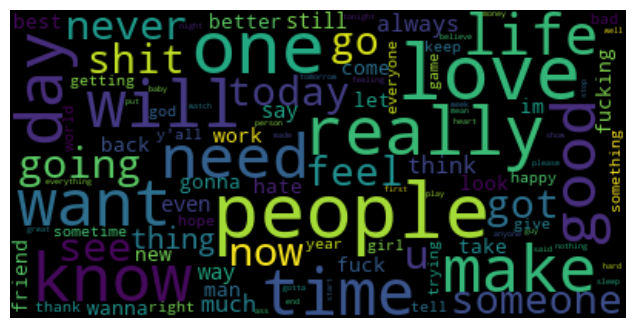

In [22]:
text = ' '.join(df[['0', '1', '2']].astype(str).agg(' '.join, axis=1))

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="black").generate(text)
 
# Plotting the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloud.png")
plt.show()

In [29]:
# Function to create a string instance based on specific columns in a DataFrame
def combine_columns_to_string(index):
    # Ensuring the index is non-negative
    assert index >= 0, 'Index cannot be a negative integer'

    # Retrieving the row at the specified index
    selected_row = df.iloc[index, :]

    # Combining columns 0, 1, and 2 into a single string
    # making the poem seem together at similar manner
    combined_string = str(selected_row[1]) +' ' +str(selected_row[2]) + ' '+str(selected_row[3])

    return combined_string

# Applying the function to each row in the df
document = [combine_columns_to_string(i) for i in range(len(df.iloc[:, 2]))]
print(len(document))
document[:10]

C:\Users\OMEN\AppData\Local\Temp\ipykernel_10284\2532235273.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  combined_string = str(selected_row[1]) +' ' +str(selected_row[2]) + ' '+str(selected_row[3])


26327


["visiting the graves stronger the october wind at my grandparents'",
 'profound blue of night  the resin and salt of pines so far from the sea',
 'scattered in the ditch  like tiny scraps of blue sky bits of plastic bag',
 'the smell of her hands on the neck of the bottle drinking greedily',
 "christmas services a cellular phone rings out handel's messiah",
 "gazing at the moon on a still summer's evening feast for mosquitoes",
 'my tea gets colder and the madeleine just sinks memory betrays',
 'small green waves crashing against a porcelain rim morning tea tempest',
 'red poppies growing between rows of white tombstones as in remembrance',
 'in front of bronze doors they huddle against the cold the newly homeless']

In [32]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

In [33]:
torch.cuda.is_available()

True

In [63]:
document = ['<start> ' + poem + ' <end>' for poem in document] 

In [133]:
all_topics = df['best topic'].values
len(all_topics)

26327

In [135]:
def num_syllables_word(word):
    if word == '<mask>':
        return -1
    try:
        # from: https://datascience.stackexchange.com/questions/23376/how-to-get-the-number-of-syllables-in-a-word
        return [len(list(y for y in x if y[-1].isdigit())) for x in cmu_dict[word.lower()]][0]
    except:
        return -1
    
def n_syllables(sentence):
    num_syllabes = 0
    for word in sentence.split():
        num_s = num_syllables_word(word)
        if num_s != -1:
            num_syllabes += num_syllables_word(word)
    return num_syllabes

In [142]:
CLS = '<s>'
SEP = '</s>'

In [145]:
def generate_random_mask(corpus):
#     print(corpus)
    words = corpus.split()
    for i in range(len(words)):
        val = np.random.uniform(0, 1)
    # Generate 
        if val > 0.6:
            words[i] = '<mask>'
    corpus = ' '.join(words)
    #sent = sent.join("</s>")
    return corpus


def mask_document(document):
#     print(document)
    masked_document = []
    masked_corpus = ''
    for corpus in document:
        masked_corpus = generate_random_mask(corpus)
        masked_document.append(masked_corpus)
    return masked_document

def mask_row_in_df(df):
#     print(len(topic_list))
    masked_poems = []
    original_poems = []
    i = 0
    for idx,row in df.iterrows():
#         print(i)
        topic = all_topics[i]
#         print(row)
        sent0 = generate_random_mask(row[1])
        sent1 = generate_random_mask(row[2])
        sent2 = generate_random_mask(row[3])
        
        syll0 = str(n_syllables(row[1]))
        syll1 = str(n_syllables(row[2]))
        syll2 = str(n_syllables(row[3]))
    
        
#         masked_sent = " ".join(['<mask>',CLS, sent0, syll0, SEP, CLS, sent1, syll1, SEP, CLS, sent2, syll2, SEP])
        masked_sent = " ".join([topic, CLS, sent0, syll0, SEP, CLS, sent1, syll1, SEP, CLS, sent2, syll2, SEP])
        original_sent = " ".join([topic, CLS, row[1], syll0, SEP, CLS,  row[2], syll1, SEP, CLS, row[3], syll0, SEP])
        
        masked_poems.append(masked_sent)
        original_poems.append(original_sent)
        i += 1
    return masked_poems, original_poems


masked_poems, original_poems = mask_row_in_df(df)
len(df)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_10284\1106957614.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sent0 = generate_random_mask(row[1])
C:\Users\OMEN\AppData\Local\Temp\ipykernel_10284\1106957614.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sent1 = generate_random_mask(row[2])
C:\Users\OMEN\AppData\Local\Temp\ipykernel_10284\1106957614.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sent2 = generate_random

26327

In [187]:
masked_poems[0], original_poems[0]

("topic12 <s> visiting the <mask> 0 </s> <s> stronger <mask> <mask> wind 0 </s> <s> <mask> my grandparents' 0 </s>",
 "topic12 <s> visiting the graves 0 </s> <s> stronger the october wind 0 </s> <s> at my grandparents' 0 </s>")

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
len(X_train), len(X_test)

(21061, 5266)

In [190]:
# Tokenization
tokens_masked = [poem.split() for poem in masked_poems]
tokens_original = [poem.split() for poem in original_poems]
tokens_masked[0], tokens_original[0]

(['topic12',
  '<s>',
  'visiting',
  'the',
  '<mask>',
  '0',
  '</s>',
  '<s>',
  'stronger',
  '<mask>',
  '<mask>',
  'wind',
  '0',
  '</s>',
  '<s>',
  '<mask>',
  'my',
  "grandparents'",
  '0',
  '</s>'],
 ['topic12',
  '<s>',
  'visiting',
  'the',
  'graves',
  '0',
  '</s>',
  '<s>',
  'stronger',
  'the',
  'october',
  'wind',
  '0',
  '</s>',
  '<s>',
  'at',
  'my',
  "grandparents'",
  '0',
  '</s>'])

In [191]:
# Create vocabulary and mapping for tokens
vocab = {word for poem in tokens_masked + tokens_original for word in poem}
word_to_index = {word: idx for idx, word in enumerate(vocab)}
index_to_word = {idx: word for word, idx in word_to_index.items()}

In [192]:
len(word_to_index)

16771

In [193]:
# Convert tokens to indices
indexed_tokens_original = [[word_to_index[word] for word in poem] for poem in tokens_original]
indexed_tokens_masked = [[word_to_index[word] for word in poem] for poem in tokens_masked]

In [194]:
# Padding sequences for fixed input size
# Use pad_sequence from torch.nn.utils.rnn
padded_tokens_original = pad_sequence([torch.tensor(poem) for poem in indexed_tokens_original], batch_first=True)
padded_tokens_masked = pad_sequence([torch.tensor(poem) for poem in indexed_tokens_masked], batch_first=True)

In [196]:
padded_tokens_original[0], padded_tokens_masked[0], len(padded_tokens_masked), len(padded_tokens_original)

(tensor([12740,  4975, 12864,  2715,  5373,  5721,  5615,  4975,  2963,  2715,
         15030, 10156,  5721,  5615,  4975,  6375, 15116, 11989,  5721,  5615,
             0,     0,     0,     0,     0,     0,     0]),
 tensor([12740,  4975, 12864,  2715,  1402,  5721,  5615,  4975,  2963,  1402,
          1402, 10156,  5721,  5615,  4975,  1402, 15116, 11989,  5721,  5615,
             0,     0,     0,     0,     0,     0,     0]),
 26327,
 26327)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(padded_tokens_masked, padded_tokens_original, test_size=0.2, shuffle=True)
X_train[0],y_train[0], X_test[0], y_test[0], len(X_train), len(X_test)

(tensor([11779,  4975,  1402,  1402,  5721,  5615,  4975,  1402,  1402, 15202,
          1402,  5721,  5615,  4975, 14511,  1402, 15635,  5721,  5615,     0,
             0,     0,     0,     0,     0,     0,     0]),
 tensor([11779,  4975,  9036,  3658,  5721,  5615,  4975, 14123,  3363, 15202,
          2715,  5721,  5615,  4975, 14511, 12726, 15635,  5721,  5615,     0,
             0,     0,     0,     0,     0,     0,     0]),
 tensor([11769,  4975,  2715,  1402,  5016,  5721,  5615,  4975,  1402, 11908,
          1402, 15056,  2715, 12081,  5721,  5615,  4975,  1402,  2715,  7424,
          1402,  5721,  5615,     0,     0,     0,     0]),
 tensor([11769,  4975,  2715, 10073,  5016,  5721,  5615,  4975,  7247, 11908,
         13186, 15056,  2715, 12081,  5721,  5615,  4975,  7387,  2715,  7424,
         12025,  5721,  5615,     0,     0,     0,     0]),
 21061,
 5266)

In [201]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm1 = nn.LSTM(embedding_dim, 128, batch_first=True)
        self.dropout1 = nn.Dropout(0.3)
        self.lstm2 = nn.LSTM(128, 128, batch_first=True)
        self.dropout2 = nn.Dropout(0.3)
        self.fc1 = nn.Linear(128, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out1, _ = self.lstm1(embedded)
        lstm_out1 = self.dropout1(lstm_out1)
        lstm_out2, _ = self.lstm2(lstm_out1)
        lstm_out2 = self.dropout2(lstm_out2[:, -1, :])  # Select the last timestep
        fc1_out = self.fc1(lstm_out2)
        fc1_out = self.relu(fc1_out)
        output = self.fc2(fc1_out)
        return output

In [202]:
vocab_size = len(vocab)
print(vocab_size)
embedding_dim = 100
hidden_size = 128
num_layers = 2  # Number of LSTM layers
model = LSTMModel(vocab_size, embedding_dim)
model

16771


LSTMModel(
  (embedding): Embedding(16771, 100)
  (lstm1): LSTM(100, 128, batch_first=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (lstm2): LSTM(128, 128, batch_first=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=16771, bias=True)
)

In [204]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [205]:
model = model.to(device)
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [206]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [208]:
from torch.utils.data import DataLoader, TensorDataset

In [210]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_dataset, test_dataset

(<torch.utils.data.dataset.TensorDataset at 0x209643e4fd0>,
 <torch.utils.data.dataset.TensorDataset at 0x209643e4f50>)

In [211]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x209643e6250>,
 <torch.utils.data.dataloader.DataLoader at 0x2096beb4e90>)

In [213]:
num_epochs = 10
best_val_loss = float("inf")

In [217]:
for a, b in train_loader:
    print(a.view(-1).shape)
    print(b.view(-1).shape)
    break

torch.Size([3456])
torch.Size([3456])


In [219]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        print(outputs.shape, labels.shape)
        loss = criterion(outputs.view(-1), labels.view(-1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Saving the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'major_best_model.pth')

torch.Size([128, 16771]) torch.Size([128, 27])


RuntimeError: size mismatch (got input: [2146688], target: [3456])

In [150]:
# Create vocabulary and mapping for tokens
vocab = {word for poem in tokens_original + tokens_masked for word in poem}
word_to_index = {word: idx for idx, word in enumerate(vocab)}
index_to_word = {idx: word for word, idx in word_to_index.items()}

In [162]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [173]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers, dense_units):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, dense_units)
        self.relu = nn.ReLU()  # ReLU activation function
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(dense_units, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        output = self.dropout(self.relu(self.fc1(lstm_out[:, -1, :])))  # Using output from the last LSTM time step
        output = self.fc2(output)
        return output

In [174]:
# Initialize model and define hyperparameters
vocab_size = len(vocab)
print(vocab_size)
embedding_dim = 100
hidden_size = 128
num_layers = 2  # Number of LSTM layers
model = LSTMModel(vocab_size, embedding_dim, hidden_size, num_layers=4, dense_units=512)
model

16771


LSTMModel(
  (embedding): Embedding(16771, 100)
  (lstm): LSTM(100, 128, num_layers=4, batch_first=True)
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=512, out_features=16771, bias=True)
)

In [165]:
model.to(device)
padded_tokens_original = padded_tokens_original.to(device)
padded_tokens_masked = padded_tokens_masked.to(device)

In [166]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [167]:
# Define your training and validation datasets using DataLoader
class PoemDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [168]:
train_dataset = PoemDataset(padded_tokens_original)
val_dataset = PoemDataset(padded_tokens_masked)

In [169]:
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [170]:
# LSTM Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        output = model(batch)
        loss = criterion(output.view(-1, vocab_size), batch.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss}")

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            output = model(batch)
            loss = criterion(output.view(-1, vocab_size), batch.view(-1))
            val_loss += loss.item()

    print(f"Validation Loss: {val_loss}")

Epoch [1/10], Loss: 5289.422112494707
Validation Loss: 8778.930149316788
Epoch [2/10], Loss: 1233.0104473531246
Validation Loss: 8896.371414899826
Epoch [3/10], Loss: 283.61494982033037
Validation Loss: 9372.91098344326
Epoch [4/10], Loss: 56.73804827471031
Validation Loss: 9729.821168541908
Epoch [5/10], Loss: 13.33830129863054
Validation Loss: 9477.990713477135
Epoch [6/10], Loss: 4.109208568048416
Validation Loss: 9552.521923422813


KeyboardInterrupt: 

In [65]:
tokens = [poem.split() for poem in document]
print(len(tokens))
tokens[:2]

26327


[['<start>',
  'visiting',
  'the',
  'graves',
  'stronger',
  'the',
  'october',
  'wind',
  'at',
  'my',
  "grandparents'",
  '<end>'],
 ['<start>',
  'profound',
  'blue',
  'of',
  'night',
  'the',
  'resin',
  'and',
  'salt',
  'of',
  'pines',
  'so',
  'far',
  'from',
  'the',
  'sea',
  '<end>']]

In [66]:
# # Add '<start>' token to vocabulary and mapping
# vocab = {'<start>'}  # Initialize with the '<start>' token
# for poem in tokens:
#     vocab.update(set(poem))

In [67]:
vocab

{'armory',
 'stacked',
 'spaghetti',
 'poked',
 'flanagan',
 'implementation',
 'welsh',
 'timid',
 'plath',
 'pave',
 'kirstie',
 'started',
 'blend',
 'midget',
 'bisque',
 'shrubbery',
 'featured',
 'starman',
 'reaching',
 'richly',
 'rancid',
 'bursting',
 'knocking',
 'milly',
 'neuroscience',
 'wasps',
 'moon',
 'sewing',
 'ethereal',
 'sweetheart',
 'hemisphere',
 'compassion',
 'layovers',
 'hanging',
 'noel',
 'bandits',
 'walking',
 'prayers',
 'regretted',
 'jens',
 "wednesday's",
 'sought',
 'sevilla',
 'harry',
 'derek',
 'fatherhood',
 "party's",
 'keyboard',
 'fulfill',
 'illegals',
 'finishes',
 'masterpiece',
 'malaria',
 'rizzo',
 'bashing',
 'pair',
 'overhead',
 'dedicated',
 'outlet',
 'scheduled',
 'latest',
 'trash',
 'sink',
 'approaches',
 'cope',
 'winding',
 'suey',
 'frightened',
 'breasted',
 'mistaken',
 'paid',
 'undo',
 'rebecca',
 'steady',
 'liberal',
 'urie',
 'expanding',
 'policemen',
 'tearful',
 'hurricanes',
 'touch',
 'number',
 'blocked',
 'co

In [130]:
# creating the vocabulary and maping for the tokens
vocab = {word for poem in tokens for word in poem}
word_to_index = {word: idx for idx, word in enumerate(vocab)}
index_to_word = {idx: word for word, idx in word_to_index.items()}
print(len(word_to_index), len(vocab))
print(word_to_index)

16754 16754
{'armory': 0, 'stacked': 1, 'spaghetti': 2, 'poked': 3, 'flanagan': 4, 'implementation': 5, 'welsh': 6, 'timid': 7, 'plath': 8, 'pave': 9, 'kirstie': 10, 'started': 11, 'blend': 12, 'midget': 13, 'bisque': 14, 'shrubbery': 15, 'featured': 16, 'starman': 17, 'reaching': 18, 'richly': 19, 'rancid': 20, 'bursting': 21, 'knocking': 22, 'milly': 23, 'neuroscience': 24, 'wasps': 25, 'moon': 26, 'sewing': 27, 'ethereal': 28, 'sweetheart': 29, 'hemisphere': 30, 'compassion': 31, 'layovers': 32, 'hanging': 33, 'noel': 34, 'bandits': 35, 'walking': 36, 'prayers': 37, 'regretted': 38, 'jens': 39, "wednesday's": 40, 'sought': 41, 'sevilla': 42, 'harry': 43, 'derek': 44, 'fatherhood': 45, "party's": 46, 'keyboard': 47, 'fulfill': 48, 'illegals': 49, 'finishes': 50, 'masterpiece': 51, 'malaria': 52, 'rizzo': 53, 'bashing': 54, 'pair': 55, 'overhead': 56, 'dedicated': 57, 'outlet': 58, 'scheduled': 59, 'latest': 60, 'trash': 61, 'sink': 62, 'approaches': 63, 'cope': 64, 'winding': 65, 'su

In [69]:
# Convert tokens to indices
indexed_tokens = [[word_to_index[word] for word in poem] for poem in tokens]

# Padding sequences for fixed input size
padded_tokens = pad_sequence([torch.tensor(poem) for poem in indexed_tokens], batch_first=True)

In [70]:
# Creating a custom dataset and dataloader for torch
class PoemDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [71]:
# Create dataset and dataloader
poem_dataset = PoemDataset(padded_tokens)
batch_size = 8
poem_loader = DataLoader(poem_dataset, batch_size=batch_size, shuffle=True)
poem_dataset, poem_loader

(<__main__.PoemDataset at 0x208592e9d50>,
 <torch.utils.data.dataloader.DataLoader at 0x208593acf10>)

In [72]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [110]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim,num_layers, hidden_size, dropout=0.15):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.vocab_size = vocab_size
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, X, h=None, c=None):
        if h is None:
            h, c = self.init_state(X.size(0))
        out = self.embedding(X)
        out, (h, c) = self.lstm(out)
#         out = out.contiguous().view(-1, self.hidden_size)
        out = self.fc1(out)
#         out = out.view(-1, X.size(1), self.vocab_size)
#         out = out[:, -1]
        
        return out,h,c
    
    def init_state(self, batch_size):
        num_l = self.num_layers
        hidden = torch.zeros(num_l, batch_size, self.hidden_size).to(device)
        cell = torch.zeros(num_l, batch_size, self.hidden_size).to(device)
        return hidden, cell

In [111]:
# Initialize model and define hyperparameters
vocab_size = len(vocab)
embedding_dim = 128
hidden_size = 128
num_layers = 3
model = LSTMModel(vocab_size, embedding_dim,num_layers, hidden_size)
model

LSTMModel(
  (embedding): Embedding(16754, 128)
  (lstm): LSTM(128, 128, num_layers=3, batch_first=True, dropout=0.15)
  (fc1): Linear(in_features=128, out_features=16754, bias=True)
)

In [112]:
model.to(device)
padded_tokens = padded_tokens.to(device)

In [113]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [115]:
losses = []
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0
    for batch in poem_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        output,h,c = model(batch)
#         print(output.view(-1, vocab_size).shape, batch.view(-1).shape)
        loss = criterion(output.view(-1, vocab_size), batch.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    losses.append(total_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss}")

Epoch [1/10], Loss: 6491.430771231651
Epoch [2/10], Loss: 3144.0588815808296
Epoch [3/10], Loss: 2003.1502209156752
Epoch [4/10], Loss: 1394.662293549627
Epoch [5/10], Loss: 1002.2501137368381
Epoch [6/10], Loss: 712.7316793561913
Epoch [7/10], Loss: 495.9138678358868
Epoch [8/10], Loss: 349.74041378544644
Epoch [9/10], Loss: 253.13622118951753
Epoch [10/10], Loss: 185.97552062012255


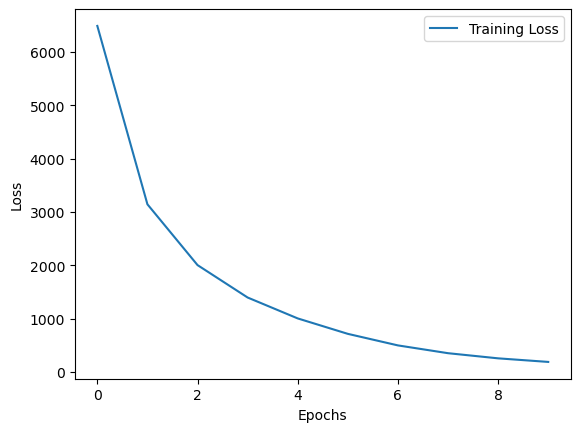

In [116]:
# Plot the training loss curve
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [121]:
# Evaluation
def generate_poem(model, start_token='<start>', max_length=50):
    poem = [start_token]
    hidden = None

    for _ in range(max_length):
        input_seq = torch.tensor([[word_to_index[poem[-1]]]])
        output, _, _ = model(input_seq)
        probabilities = nn.functional.softmax(output.squeeze(), dim=0).detach().numpy()
        predicted_index = np.random.choice(len(vocab), p=probabilities)
        predicted_word = index_to_word[predicted_index]
        poem.append(predicted_word)
        if predicted_word == '<end>':
            break

    return ' '.join(poem)

In [122]:
model.to("cpu")
generated_poem = generate_poem(model)
print(generated_poem)

<start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start> <start>
